In [1]:
import numpy
import numpy as np
import pandas as pd
import sys, glob
import urllib3
import h5py
import cdsapi, zipfile, os, time
import warnings
import shutil
import xarray
from datetime import date
warnings.filterwarnings('ignore')
# import pycountry
sys.path.append(os.getcwd()+'/../cds-backend/code/')
import cds_eua3 as eua
import numba
import copy
import glob
from numba import njit
import pandas
import glob

In [2]:
def request(rqdict):
    t0 = time.time()

    c = cdsapi.Client()
    r = c.retrieve(
        'insitu-comprehensive-upper-air-observation-network',rqdict)
    if True:
        r.download(target='download.zip')
        assert os.stat('download.zip').st_size == r.content_length, "Downloaded file is incomplete"
    z = zipfile.ZipFile('download.zip')
    z.extractall(path='./test/')
    z.close()
    
    files = glob.glob('./test/*.nc')
    data = eua.CDMDataset(files[0])
#     with eua.CDMDataset(files[0])  as f:
#         data = f#.to_dataframe()
#     data.to_dataframe()

    
    os.remove('download.zip')
    for i in files:
        os.remove(i)
    try:
        shutil.rmtree('./test4/')
    except:
        pass
    
    return data

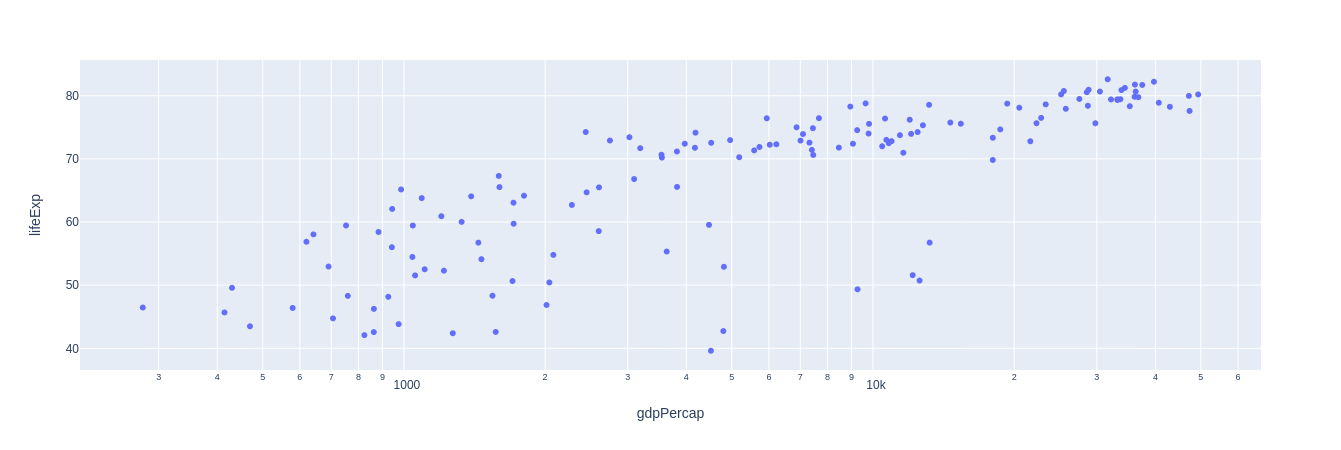

In [3]:
import plotly
import plotly.express as px
plotly.offline.init_notebook_mode(connected=True)
df = px.data.gapminder().query("year == 2007")

fig = px.scatter(df, x="gdpPercap", y="lifeExp", hover_name="country", log_x=True)
fig.show()

In [19]:
data = request({'variable':'temperature', 'statid':'11035', 'date':'20180201'})

2021-05-28 11:18:50,057 INFO Welcome to the CDS
2021-05-28 11:18:50,058 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2021-05-28 11:18:50,130 INFO Request is queued
2021-05-28 11:18:51,165 INFO Request is completed
2021-05-28 11:18:51,166 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1622193530.4601433-19058-20-e1afa751-83fb-436a-af2d-607da0d4c87e.zip to download.zip (41.3K)
2021-05-28 11:18:51,273 INFO Download rate 386.4K/s


In [20]:
data

File: <HDF5 file "dest_0-20001-0-11035_air_temperature.nc" (mode r)>
Permissions:  (a1400070)
Filesize: 0.04 MB
Filename: ./test/dest_0-20001-0-11035_air_temperature.nc
(G)roups/(V)ariables: 

 - V | lat__________________________________________ : : (192,)
 - V | lon__________________________________________ : : (192,)
 - V | plev_________________________________________ : : (192,)
 - V | report_id____________________________________ : : (192, 11)
 - V | station_id___________________________________ : : (192, 25)
 - V | ta___________________________________________ : : (192,)
 - V | time_________________________________________ : : (192,)
 - V | trajectory_index_____________________________ : : (192,)
 - V | trajectory_label_____________________________ : : (2, 14)

In [21]:
data.to_dataframe()

2021-05-28 11:18:52,169 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.248951,16.35718,570.0,10000053755,WIEN/HOHE WARTE (11035-0),241.869995,2018-02-01 11:30:04,nnnnnnnnnnnnnn
1,48.248951,16.35718,600.0,10000053755,WIEN/HOHE WARTE (11035-0),240.460007,2018-02-01 11:30:04,nnnnnnnnnnnnnn
2,48.248951,16.35718,670.0,10000053755,WIEN/HOHE WARTE (11035-0),235.550003,2018-02-01 11:30:04,nnnnnnnnnnnnnn
3,48.248951,16.35718,720.0,10000053755,WIEN/HOHE WARTE (11035-0),235.389999,2018-02-01 11:30:04,nnnnnnnnnnnnnn
4,48.248951,16.35718,800.0,10000053755,WIEN/HOHE WARTE (11035-0),229.770004,2018-02-01 11:30:04,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
187,48.248951,16.35718,86800.0,10000053756,WIEN/HOHE WARTE (11035-0),270.850006,2018-02-01 23:30:02,nnnnnnnnnnnnnn
188,48.248951,16.35718,92120.0,10000053756,WIEN/HOHE WARTE (11035-0),273.869995,2018-02-01 23:30:02,nnnnnnnnnnnnnn
189,48.248951,16.35718,92500.0,10000053756,WIEN/HOHE WARTE (11035-0),274.179993,2018-02-01 23:30:02,nnnnnnnnnnnnnn
190,48.248951,16.35718,94500.0,10000053756,WIEN/HOHE WARTE (11035-0),275.239990,2018-02-01 23:30:02,nnnnnnnnnnnnnn
